In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2 as cv

In [3]:
os.getcwd()

'c:\\Users\\khans24.CC\\projects\\gui-automation\\playground'

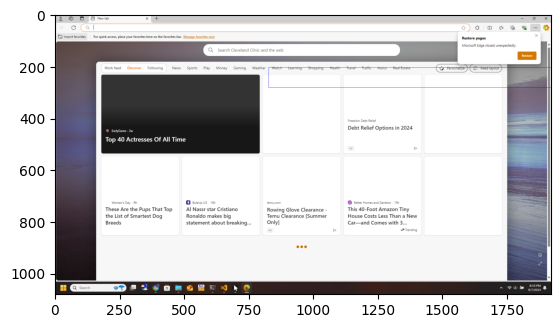

In [22]:
msedge_screen = cv.imread("../fixtures/screenshots/before_input_by_template.png", cv.IMREAD_COLOR)
msedge_gray = cv.imread("../fixtures/screenshots/before_input_by_template.png", cv.IMREAD_GRAYSCALE)
plt.imshow(msedge_screen)

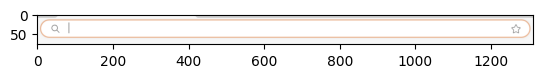

In [24]:
match_template = cv.imread("../fixtures/unit/msedge_omnibox.png", cv.IMREAD_COLOR)
match_gray = cv.imread("../fixtures/unit/msedge_omnibox.png", cv.IMREAD_GRAYSCALE)
plt.imshow(match_template)

In [20]:
def match_template_on_image(image, template, mask=None):
    result = cv.matchTemplate(image, template, cv.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
    match_rect = cv.rectangle(image.copy(), max_loc, (max_loc[0] + template.shape[1], max_loc[1] + template.shape[0]), (0, 255, 0), 2)
    print(f"Match location: {max_loc}, Match value: {max_val}")
    plt.imshow(match_rect)
    plt.axis("off")
    plt.show()

def match_template_colormap_overlay(image, template):
    result = cv.matchTemplate(image, template, cv.TM_CCOEFF_NORMED)

    # Normalize the result to range 0..1 for better visualization
    result_norm = cv.normalize(result, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    pad_y = image.shape[0] - result_norm.shape[0]
    pad_x = image.shape[1] - result_norm.shape[1]
    result_padded = np.pad(result_norm, ((0, pad_y), (0, pad_x)))

    # Create an RGB version of the match result using a colormap
    result_colormap = cv.applyColorMap((result_padded*255).astype(np.uint8), cv.COLORMAP_JET)

    # Create an alpha channel based on the match result
    alpha_channel = (result_padded * 255).astype(np.uint8)
    result_colormap = cv.cvtColor(result_colormap, cv.COLOR_BGR2BGRA)
    result_colormap[:, :, 3] = alpha_channel

    # Create an RGBA version of the input image
    image_rgba = cv.cvtColor(image, cv.COLOR_BGR2BGRA)

    # Overlay the match result on the input image
    overlay = cv.addWeighted(image_rgba, 0.7, result_colormap, 0.3, 0)

    # Display the overlay
    plt.imshow(cv.cvtColor(overlay, cv.COLOR_BGRA2RGBA))
    plt.axis('off')
    plt.show()


Match location: (208, 8), Match value: 0.43308278918266296


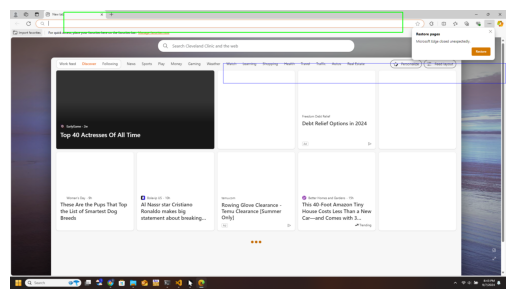

In [21]:
match_template_on_image(msedge_screen, match_template)

Match location: (208, 8), Match value: 0.44379642605781555


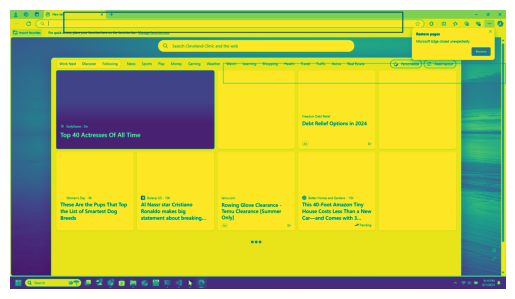

In [26]:
match_template_on_image(msedge_gray, match_gray, mask=None)

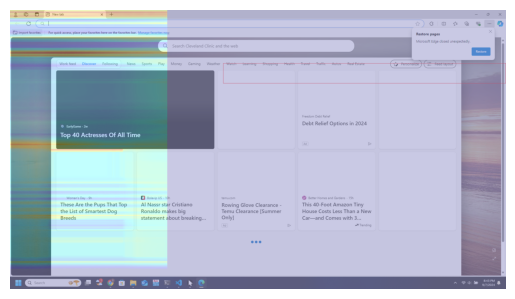

In [13]:
match_template_colormap_overlay(msedge_screen, match_template)

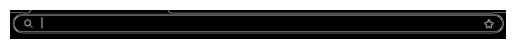

In [14]:
templ_edges = cv.Canny(match_template, 50, 200)
plt.imshow(templ_edges, cmap='gray')
plt.axis("off")
plt.show()

Match location: (159, 856), Match value: inf


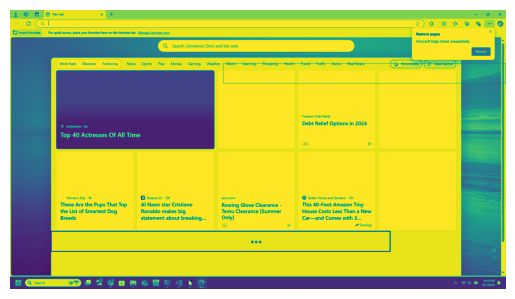

In [27]:
def match_template_on_image(image, template, mask):
    result = cv.matchTemplate(image, template, cv.TM_CCOEFF_NORMED, mask=mask)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
    match_rect = cv.rectangle(image.copy(), max_loc, (max_loc[0] + template.shape[1], max_loc[1] + template.shape[0]), (0, 255, 0), 2)
    print(f"Match location: {max_loc}, Match value: {max_val}")
    plt.imshow(match_rect)
    plt.axis("off")
    plt.show()

match_template_on_image(msedge_gray, match_gray, templ_edges)